In [20]:
# Read data
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

current_dir = os.getcwd()
train_csv_path = os.path.join(current_dir, "E:\ML intern\Task 1\house-prices-advanced-regression-techniques", "train.csv")
test_csv_path = os.path.join(current_dir, "E:\ML intern\Task 1\house-prices-advanced-regression-techniques", "test.csv")

df = pd.read_csv(train_csv_path)
test = pd.read_csv(test_csv_path)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# drop data can't fixed
df = df.drop(columns=['MiscFeature','Fence','PoolQC','FireplaceQu','MasVnrType','Alley'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
df.sample(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
258,259,60,RL,80.0,12435,Pave,Reg,Lvl,AllPub,Inside,...,0,245,0,0,0,5,2008,WD,Normal,231500


In [6]:
# teal with null values
df = df.fillna(df.mean)

In [7]:
pd.set_option('display.Max_columns',74)

In [8]:
df.sample(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
10,11,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,...,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,0,2,2008,WD,Normal,129500


In [9]:
#  selected columns as required
prodigy = df[['GrLivArea','YearBuilt','FullBath','TotalBsmtSF','BedroomAbvGr','SalePrice']]
prodigy.describe()

,GrLivArea,YearBuilt,FullBath,TotalBsmtSF,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,1.565068,1057.429452,2.866438,180921.195890
std,525.480383,30.202904,0.550916,438.705324,0.815778,79442.502883
min,334.000000,1872.000000,0.000000,0.000000,0.000000,34900.000000
25%,1129.500000,1954.000000,1.000000,795.750000,2.000000,129975.000000
50%,1464.000000,1973.000000,2.000000,991.500000,3.000000,163000.000000
75%,1776.750000,2000.000000,2.000000,1298.250000,3.000000,214000.000000
max,5642.000000,2010.000000,3.000000,6110.000000,8.000000,755000.000000


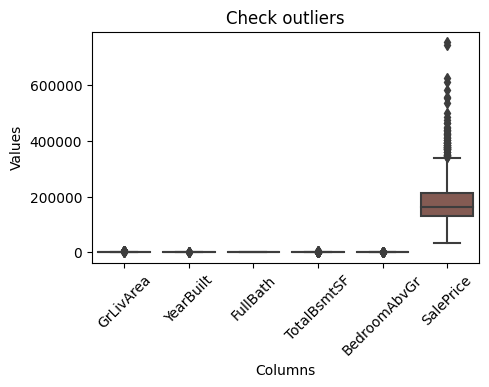

In [10]:
plt.figure(figsize=(5, 3)) 
sns.boxplot( data=prodigy) 
plt.xticks(rotation=45) 
plt.xlabel('Columns') 
plt.ylabel('Values') 
plt.title('Check outliers') 
plt.show()

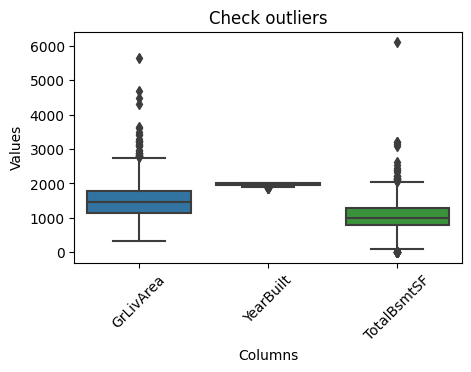

In [11]:
#  seprate them to see if there outliers
plt.figure(figsize=(5, 3)) 
sns.boxplot( data=prodigy.drop(columns=['SalePrice','BedroomAbvGr','FullBath'])) 
plt.xticks(rotation=45) 
plt.xlabel('Columns') 
plt.ylabel('Values') 
plt.title('Check outliers') 
plt.show()

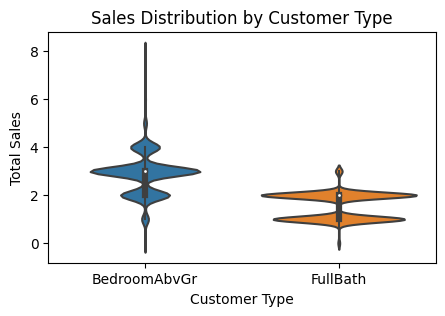

In [12]:
plt.figure(figsize=(5, 3)) 
sns.violinplot( data=prodigy[['BedroomAbvGr','FullBath']]) 
plt.xlabel('Customer Type') 
plt.ylabel('Total Sales') 
plt.title('Sales Distribution by Customer Type') 
plt.show()

In [13]:
# deal with outliers

for i in range(len(prodigy.columns)):
    upper_limit = (prodigy.iloc[:, i].quantile(0.75) + prodigy.iloc[:, i].mean()) * 1.5
    
    prodigy.iloc[:, i] = np.where(prodigy.iloc[:, i] > upper_limit, upper_limit, prodigy.iloc[:, i])

In [14]:
prodigy.describe()

,GrLivArea,YearBuilt,FullBath,TotalBsmtSF,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1514.981726,1971.267808,1.565068,1055.664739,2.866438,180669.737106
std,522.004128,30.202904,0.550916,423.277941,0.815778,77903.156095
min,334.000000,1872.000000,0.000000,0.000000,0.000000,34900.000000
25%,1129.500000,1954.000000,1.000000,795.750000,2.000000,129975.000000
50%,1464.000000,1973.000000,2.000000,991.500000,3.000000,163000.000000
75%,1776.750000,2000.000000,2.000000,1298.250000,3.000000,214000.000000
max,4938.320548,2010.000000,3.000000,3533.519178,8.000000,592381.793836


In [15]:
# prepare model
prodigyF = prodigy.drop(columns=['SalePrice'])
prodigyP = prodigy[['SalePrice']]

In [16]:
# fit model
prodigy_train,prodigy_test,prodigyP_train,prodigyP_test =train_test_split(prodigyF,prodigyP,test_size=.15,random_state=1)
model = LinearRegression()
model.fit(prodigy_train,prodigyP_train)
predict = model.predict(prodigy_test)

In [17]:
# Enter your input 
import tkinter as tk
from tkinter import simpledialog

# Function to get user input
def get_user_input():
    # Create a Tkinter window
    root = tk.Tk()
    root.withdraw()  # Hide the root window

    # Get user input for each parameter
    year = int(simpledialog.askstring("Input", "Enter the year please"))
    area = int(simpledialog.askstring("Input", "Enter the area please"))
    bathR = int(simpledialog.askstring("Input", "Enter the bathRooms number please"))
    bedR = int(simpledialog.askstring("Input", "Enter the bedRooms number please"))
    TotalBsmtSF = int(simpledialog.askstring("Input", "Enter the TotalBsmtSF please"))
    
    # Close the Tkinter window
    root.destroy()
    
    return year, area, bathR, bedR, TotalBsmtSF

# Get user input
year, area, bathR, bedR, TotalBsmtSF = get_user_input()


In [18]:
# The expected price
price_pred = pd.DataFrame({'GrLivArea':[area],'YearBuilt':[year],'FullBath':[bathR],'TotalBsmtSF':[TotalBsmtSF],'BedroomAbvGr':[bedR]})
final_predictions=model.predict(price_pred)
price_pred['SalePrice']=final_predictions.round(2)
price_pred.head()

,GrLivArea,YearBuilt,FullBath,TotalBsmtSF,BedroomAbvGr,SalePrice
0,1350,1973,3,900,5,135516.95
